In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

In [2]:
s = hs.load('/home/ssulta24/Desktop/VCAE/data/images_3D/BFO_a-0090 (dark ref corrected).dm3')

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)


Data shape: (210, 210, 1340)
Energy axis: 420.00001668930054 to 822.0000326633453 eV
Spatial dimensions: 210 x 210 pixels


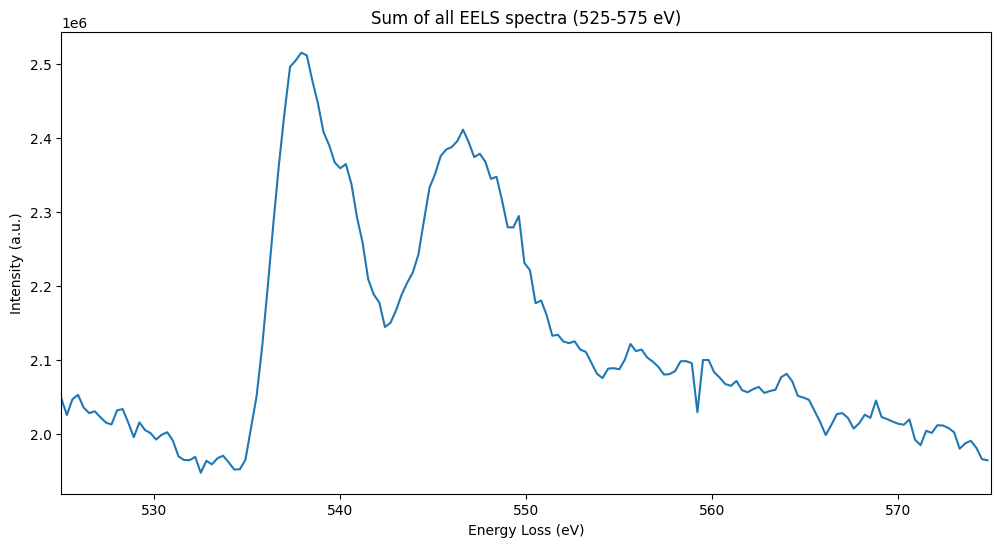

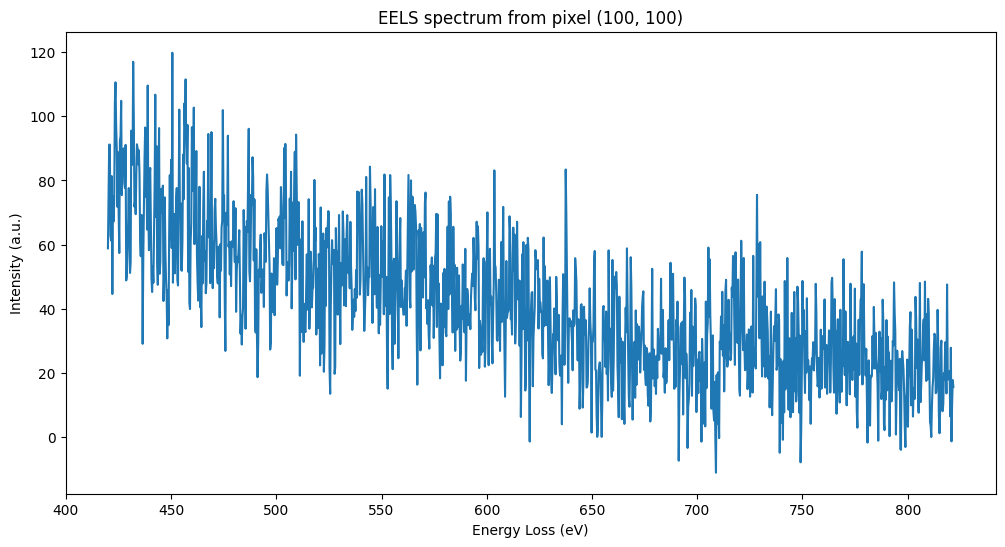

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)


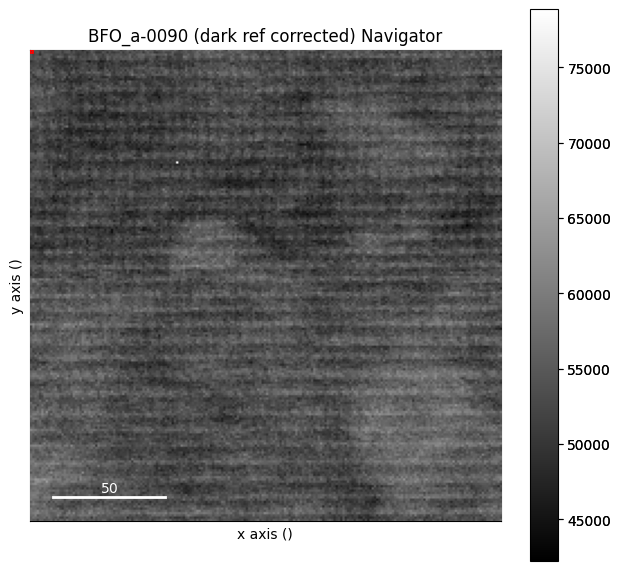

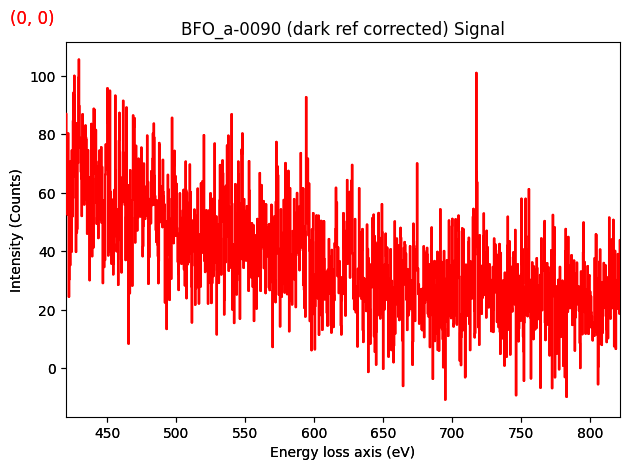

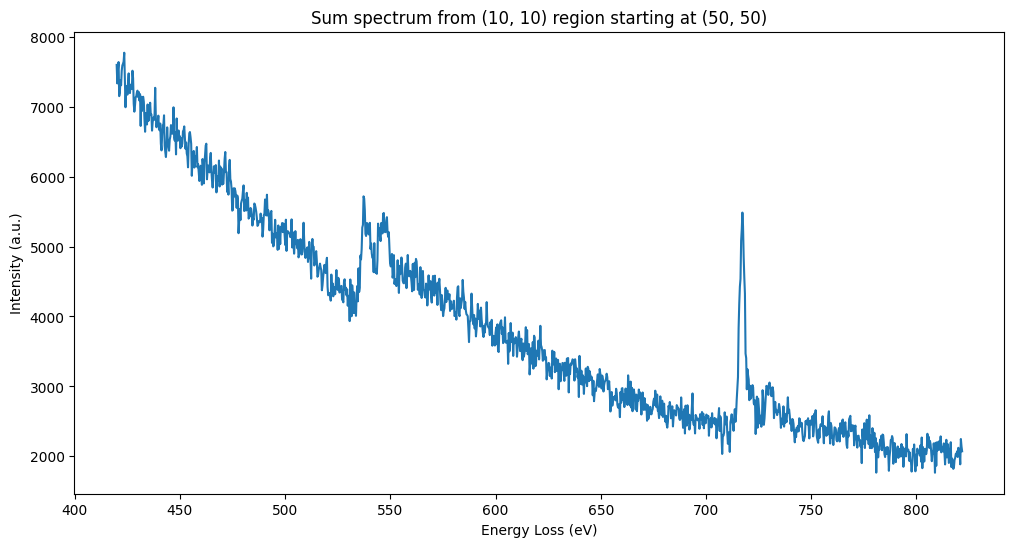

In [9]:
# Extract data
data = s.data

# Print basic information
print(f"Data shape: {data.shape}")

# Attempt to extract axis information
try:
    # Try to get energy axis (usually the last axis)
    energy_axis = s.axes_manager[-1]
    print(f"Energy axis: {energy_axis.offset} to {energy_axis.offset + energy_axis.size * energy_axis.scale} {energy_axis.units}")
    
    # Calculate energy values
    energy_values = np.arange(energy_axis.size) * energy_axis.scale + energy_axis.offset
except AttributeError:
    print("Couldn't extract energy axis information. Using index for energy axis.")
    energy_values = np.arange(data.shape[-1])

# Print spatial dimensions
spatial_dimensions = data.shape[:-1]
print(f"Spatial dimensions: {' x '.join(map(str, spatial_dimensions))} pixels")

# Find indices corresponding to 525 eV and 575 eV
start_index = np.searchsorted(energy_values, 525)
end_index = np.searchsorted(energy_values, 575)

# Plot sum spectrum for the specified energy range
plt.figure(figsize=(12, 6))
sum_spectrum = np.sum(data, axis=tuple(range(data.ndim - 1)))
plt.plot(energy_values[start_index:end_index], sum_spectrum[start_index:end_index])
plt.title('Sum of all EELS spectra (525-575 eV)')
plt.xlabel(f"Energy Loss ({energy_axis.units})")
plt.ylabel('Intensity (a.u.)')
plt.xlim(525, 575)
plt.show()

# # Plot sum spectrum
# plt.figure(figsize=(12, 6))
# sum_spectrum = np.sum(data, axis=tuple(range(data.ndim - 1)))
# plt.plot(energy_values, sum_spectrum)
# plt.title('Sum of all EELS spectra')
# plt.xlabel("Energy Loss (index)" if energy_values is None else f"Energy Loss ({energy_axis.units})")
# plt.ylabel('Intensity (a.u.)')
# # plt.xlim(525, 575)
# plt.show()

# Plot single spectrum (e.g., from pixel (100, 100) or equivalent)
plt.figure(figsize=(12, 6))
indices = tuple([min(100, dim - 1) for dim in spatial_dimensions])
single_spectrum = data[indices]
plt.plot(energy_values, single_spectrum)
plt.title(f'EELS spectrum from pixel {indices}')
plt.xlabel("Energy Loss (index)" if energy_values is None else f"Energy Loss ({energy_axis.units})")
plt.ylabel('Intensity (a.u.)')
plt.show()

# Create interactive plot (this might not work for all data structures)
try:
    s.plot()
except Exception as e:
    print(f"Couldn't create interactive plot: {str(e)}")

# Plot a specific region of interest
roi_size = tuple([min(10, dim) for dim in spatial_dimensions])
roi_start = tuple([min(50, dim - roi_size[i]) for i, dim in enumerate(spatial_dimensions)])
roi_end = tuple([start + size for start, size in zip(roi_start, roi_size)])
roi_slice = tuple(slice(start, end) for start, end in zip(roi_start, roi_end))

roi_spectrum = np.sum(data[roi_slice], axis=tuple(range(data.ndim - 1)))
plt.figure(figsize=(12, 6))
plt.plot(energy_values, roi_spectrum)
plt.title(f'Sum spectrum from {roi_size} region starting at {roi_start}')
plt.xlabel("Energy Loss (index)" if energy_values is None else f"Energy Loss ({energy_axis.units})")
plt.ylabel('Intensity (a.u.)')
plt.show()

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
Original data shape: (210, 210, 1340)
Calibrated data shape: (210, 210, 1340)
Calibrated energy values shape: 420.00001668930054 - 821.7000326514244
Cropped data shape: (210, 210, 1328)
Cropped energy values shape: 420.9000167250633 - 819.000032544136
Preprocessed data shape: (210, 210, 1328)
Preprocessed data min: 0.027754785493016243, max: 1.0
Training sub-images shape: (63, 1, 24, 24, 1328)
Anomalous sub-images shape: (1, 1, 24, 24, 1328)
Energy range: 420.00001668

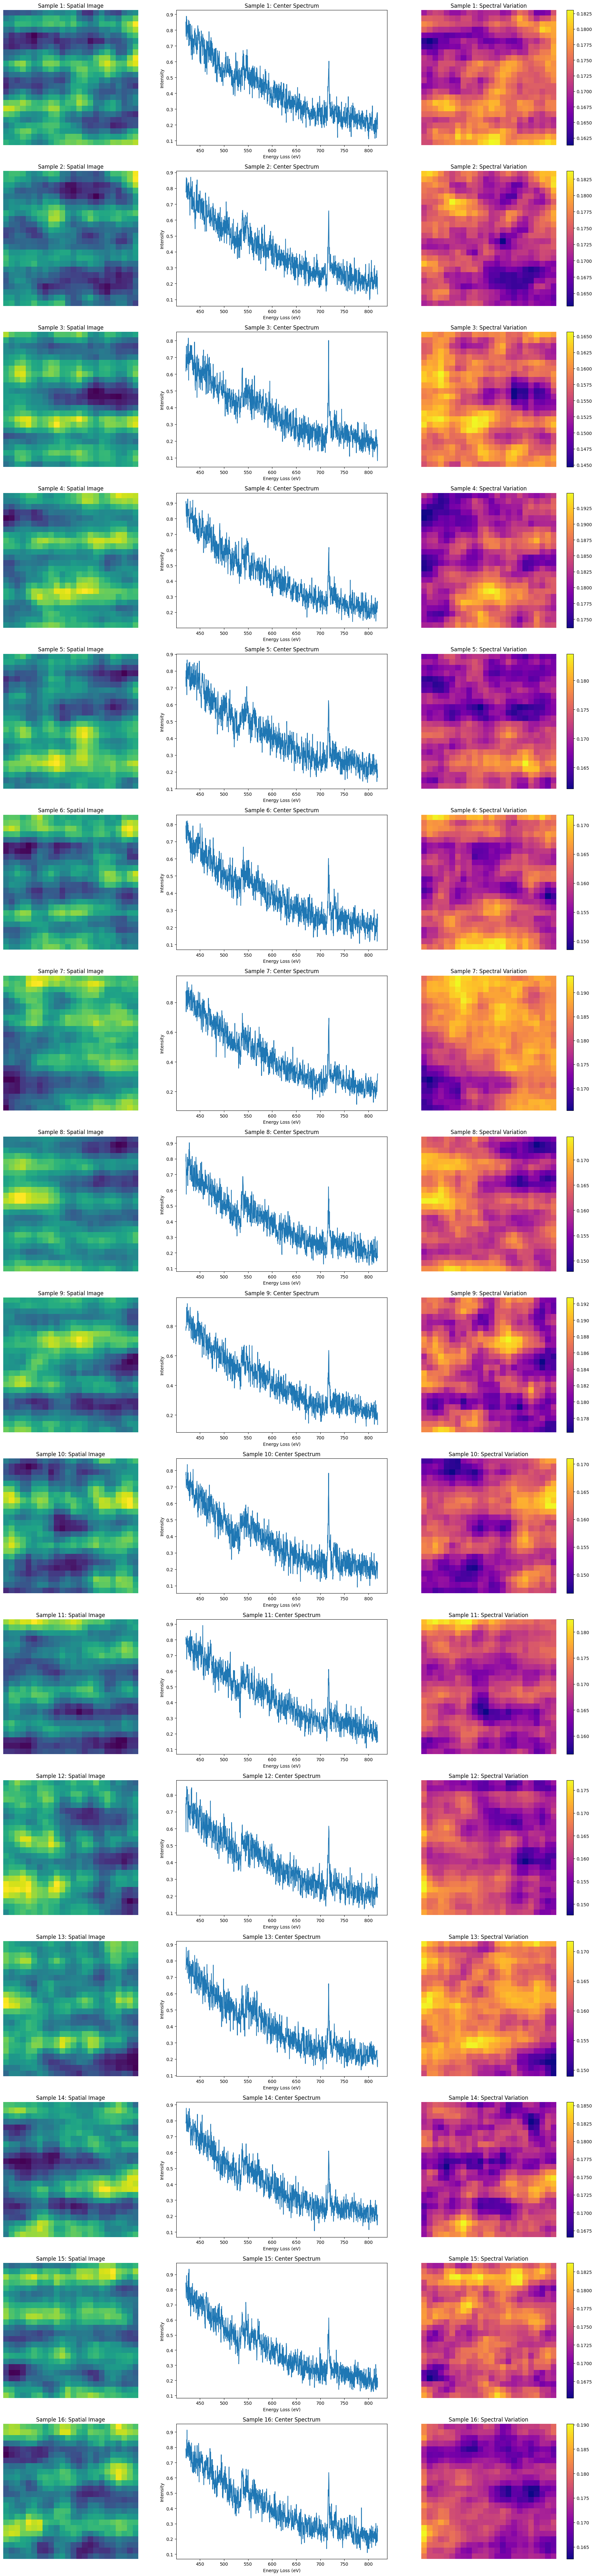

Center spectrum min: 0.08404388278722763, max: 0.9178639650344849


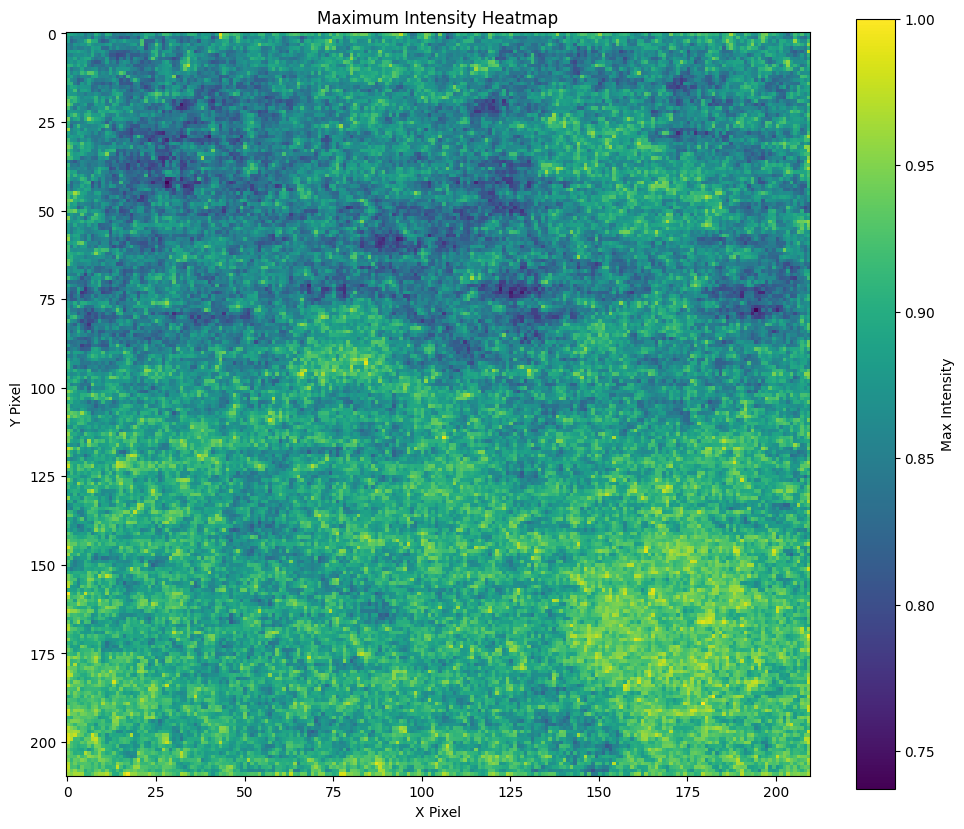

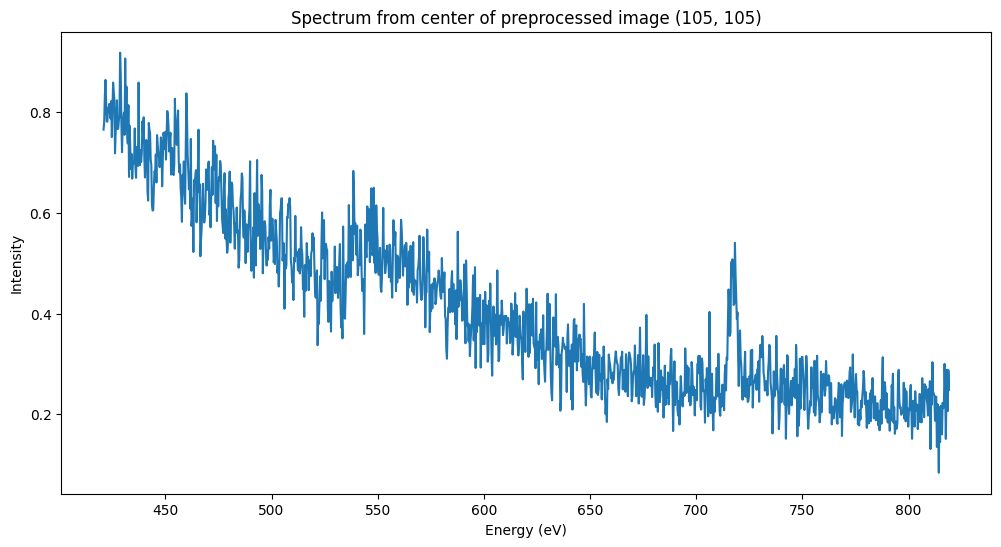

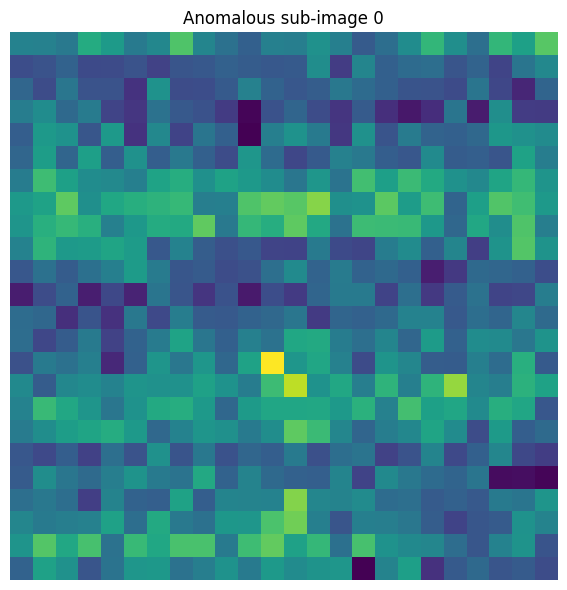

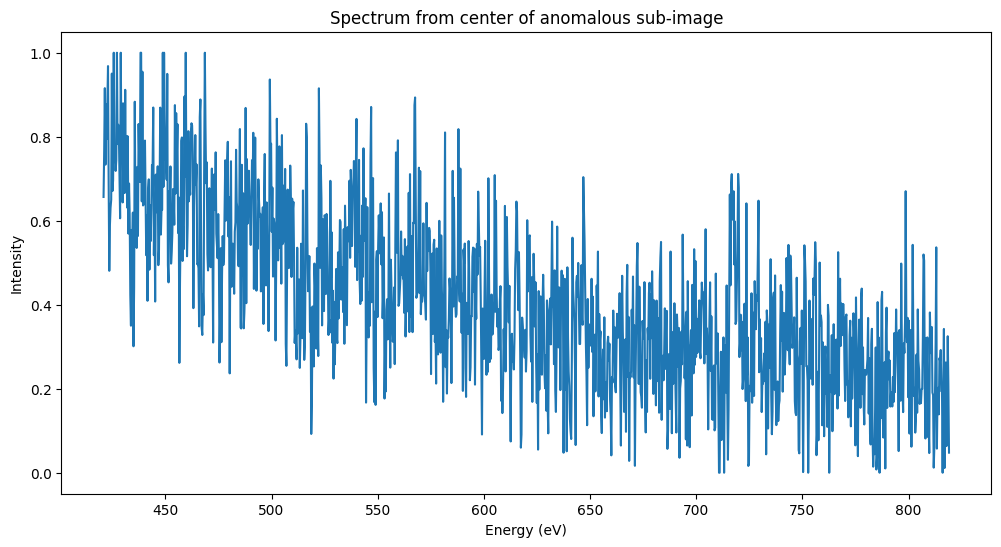

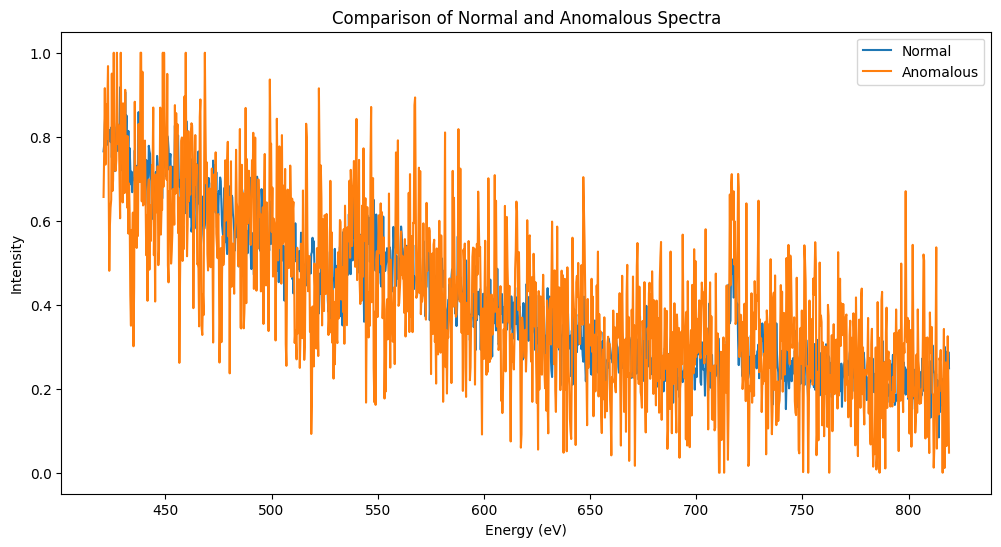

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from anomaly_detection.data.data_loader import EELSDataset, get_data_loader
from anomaly_detection.config.config_handler import get_config

# Load configuration
config = get_config("/home/ssulta24/Desktop/VCAE_new/anomaly_detection/config/config.yaml") 

# Create the dataset
dataset = EELSDataset(config)

# Check original data
original_data = dataset.get_original_data()
print(f"Original data shape: {original_data.shape}")

# Check calibrated data
calibrated_data = dataset.get_calibrated_data()
calibrated_energy = dataset.get_energy_values()
print(f"Calibrated data shape: {calibrated_data.shape}")
print(f"Calibrated energy values shape: {calibrated_energy[0]} - {calibrated_energy[-1]}")

# Check cropped data
cropped_data = dataset.get_cropped_data()
cropped_energy_range = dataset.get_cropped_energy_values() 
print(f"Cropped data shape: {cropped_data.shape}")
print(f"Cropped energy values shape: {cropped_energy_range[0]} - {cropped_energy_range[-1]}")

# Check preprocessed data
preprocessed_data = dataset.get_preprocessed_data()
print(f"Preprocessed data shape: {preprocessed_data.shape}")
print(f"Preprocessed data min: {np.min(preprocessed_data)}, max: {np.max(preprocessed_data)}")

# Check training sub-images
training_sub_images = dataset.get_training_sub_images()
print(f"Training sub-images shape: {training_sub_images.shape}")

# Check anomalous sub-images
anomaly_sub_images = dataset.get_post_scaled_anomalous_sub_images()
anomaly_sub_images = anomaly_sub_images.reshape(-1, 1, anomaly_sub_images.shape[-3], anomaly_sub_images.shape[-2], anomaly_sub_images.shape[-1])
print(f"Anomalous sub-images shape: {anomaly_sub_images.shape}")

# Check energy values
energy_values = dataset.get_energy_values()
print(f"Energy range: {energy_values[0]} to {energy_values[-1]} eV, Length: {len(energy_values)}")

# Check DataLoader
dataloader = get_data_loader(config)
batch = next(iter(dataloader))
print(f"Shape of a batch from DataLoader: {batch.shape}")

batch_size, _, height, width, energy_channels = batch.shape
num_samples = 16

fig, axes = plt.subplots(num_samples, 3, figsize=(20, 5*num_samples))
if num_samples == 1:
    axes = axes.reshape(1, -1)

for i in range(num_samples):
    sample = batch[i, 0].cpu().numpy()  # Remove channel dimension and convert to numpy
    
    # Plot spatial image (sum along energy axis)
    spatial_img = np.sum(sample, axis=-1)
    axes[i, 0].imshow(spatial_img, cmap='viridis')
    axes[i, 0].set_title(f'Sample {i+1}: Spatial Image')
    axes[i, 0].axis('off')
    
    # Plot spectrum from center pixel
    center_x, center_y = height // 2, width // 2
    center_spectrum = sample[center_x, center_y, :]
    axes[i, 1].plot(cropped_energy_range, center_spectrum)
    axes[i, 1].set_title(f'Sample {i+1}: Center Spectrum')
    axes[i, 1].set_xlabel('Energy Loss (eV)')
    axes[i, 1].set_ylabel('Intensity')
    
    # Plot 2D image of spectral variation
    spectral_variation = np.std(sample, axis=-1)
    im = axes[i, 2].imshow(spectral_variation, cmap='plasma')
    axes[i, 2].set_title(f'Sample {i+1}: Spectral Variation')
    axes[i, 2].axis('off')
    plt.colorbar(im, ax=axes[i, 2])

plt.tight_layout()
plt.show()

# Plot spectrum from center of preprocessed data
center_x, center_y = preprocessed_data.shape[0] // 2, preprocessed_data.shape[1] // 2
center_spectrum = preprocessed_data[center_x, center_y, :]
print(f"Center spectrum min: {np.min(center_spectrum)}, max: {np.max(center_spectrum)}")

# Calculate the maximum intensity along the spectral dimension
max_intensity = np.max(preprocessed_data, axis=2)
# Create the heatmap
plt.figure(figsize=(12, 10))
im = plt.imshow(max_intensity, cmap='viridis')
plt.title("Maximum Intensity Heatmap")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Max Intensity')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cropped_energy_range, center_spectrum)
plt.title(f"Spectrum from center of preprocessed image ({center_x}, {center_y})")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity")
plt.show()

# # Demonstrate min-max scaling reversal
# reversed_spectrum = dataset.reverse_min_max_scaling(center_spectrum)
# plt.figure(figsize=(12, 6))
# plt.plot(cropped_energy_range, reversed_spectrum)
# plt.title("Reversed min-max scaling of center spectrum")
# plt.xlabel("Energy (eV)")
# plt.ylabel("Original Intensity")
# plt.show()

# Visualize anomalous sub-images
if len(anomaly_sub_images) > 0:
    fig, axs = plt.subplots(1, min(3, len(anomaly_sub_images)), figsize=(20, 6))
    if len(anomaly_sub_images) == 1:
        axs = [axs]
    for i, ax in enumerate(axs):
        if i < len(anomaly_sub_images):
            img = np.sum(anomaly_sub_images[i, 0], axis=2)
            ax.imshow(img, cmap='viridis')
            ax.set_title(f"Anomalous sub-image {i}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot spectrum from center of an anomalous sub-image
    anomaly_center_x, anomaly_center_y = anomaly_sub_images.shape[2] // 2, anomaly_sub_images.shape[3] // 2
    anomaly_spectrum = anomaly_sub_images[0, 0, anomaly_center_x, anomaly_center_y, :]
    
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_energy_range, anomaly_spectrum)
    plt.title(f"Spectrum from center of anomalous sub-image")
    plt.xlabel("Energy (eV)")
    plt.ylabel("Intensity")
    plt.show()
else:
    print("No anomalous sub-images found.")

# Compare normal and anomalous spectra
if len(anomaly_sub_images) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_energy_range, center_spectrum, label='Normal')
    plt.plot(cropped_energy_range, anomaly_spectrum, label='Anomalous')
    plt.title("Comparison of Normal and Anomalous Spectra")
    plt.xlabel("Energy (eV)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.show()


WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

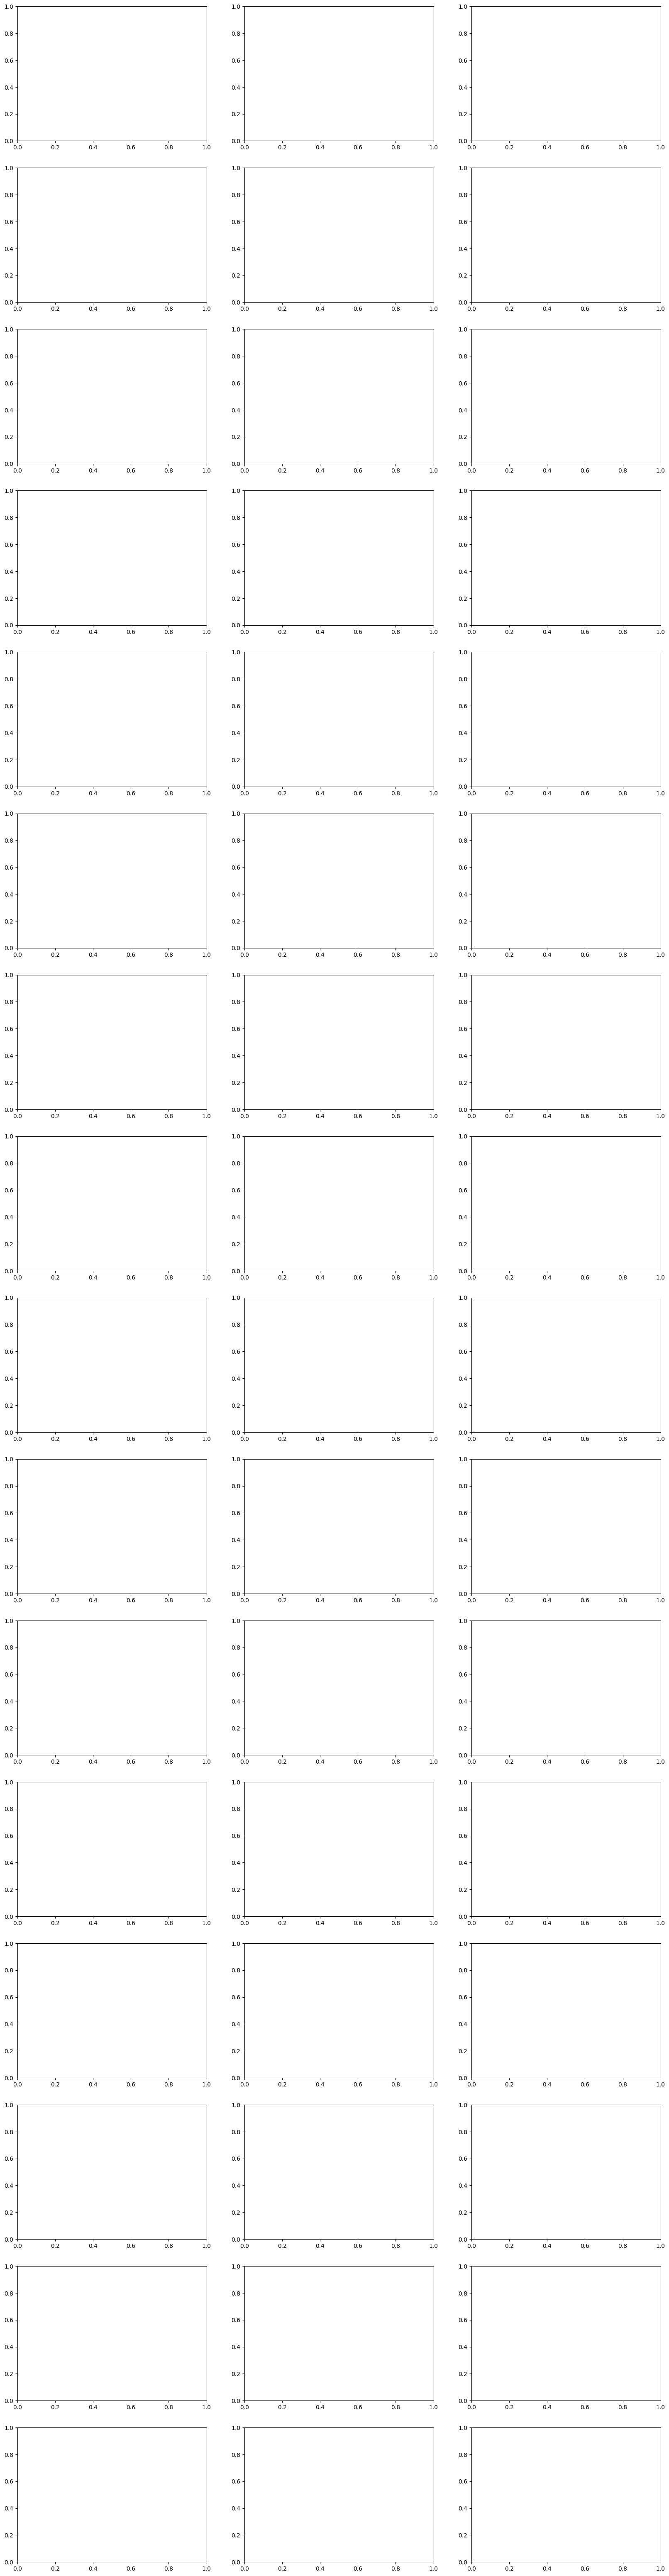

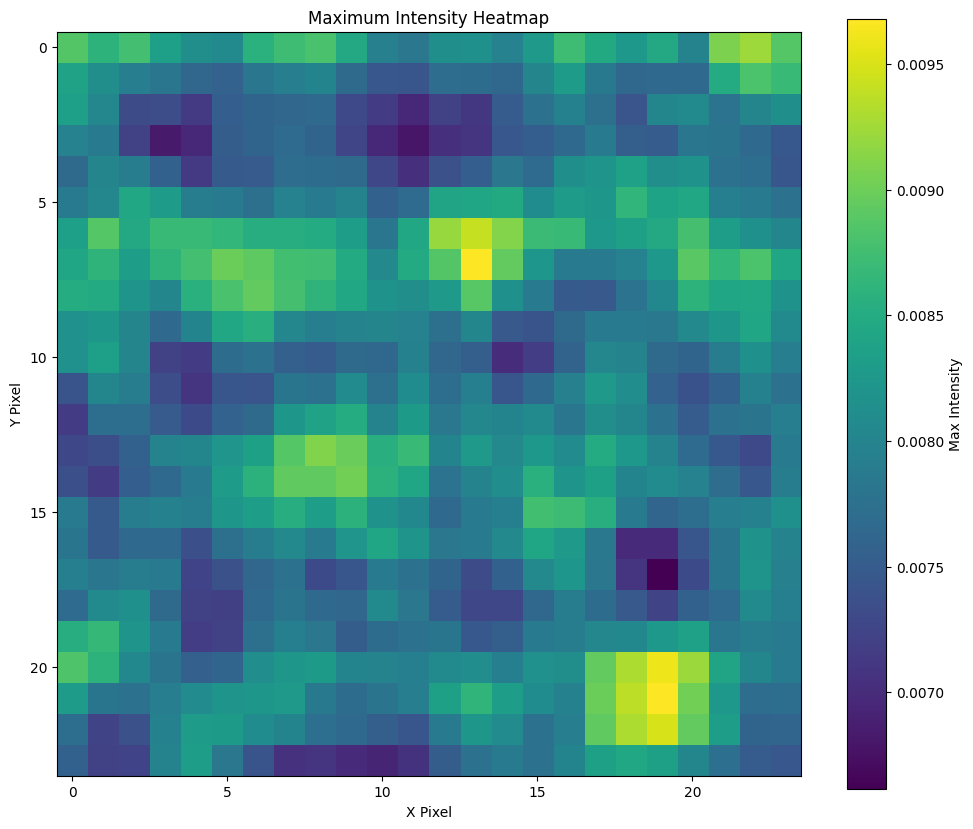

NameError: name 'cropped_energy_range' is not defined

<Figure size 1200x600 with 0 Axes>

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from anomaly_detection.data.data_loader import EELSDataset, get_data_loader
from anomaly_detection.config.config_handler import get_config

# Load configuration
config = get_config("/home/ssulta24/Desktop/VCAE_new/anomaly_detection/config/config.yaml") 

# Create the dataset
dataset = EELSDataset(config)

# Check DataLoader
dataloader = get_data_loader(config)
batch = next(iter(dataloader))
print(f"Shape of a batch from DataLoader: {batch.shape}")

batch_size, _, height, width, energy_channels = batch.shape
num_samples = 16

fig, axes = plt.subplots(num_samples, 3, figsize=(20, 5*num_samples))
if num_samples == 1:
    axes = axes.reshape(1, -1)

# for i in range(num_samples):
#     sample = batch[i, 0].cpu().numpy()  # Remove channel dimension and convert to numpy
    
#     # Plot spatial image (sum along energy axis)
#     spatial_img = np.sum(sample, axis=-1)
#     axes[i, 0].imshow(spatial_img, cmap='viridis')
#     axes[i, 0].set_title(f'Sample {i+1}: Spatial Image')
#     axes[i, 0].axis('off')
    
#     # Plot spectrum from center pixel
#     center_x, center_y = height // 2, width // 2
#     center_spectrum = sample[center_x, center_y, :]
#     axes[i, 1].plot(cropped_energy_range, center_spectrum)
#     axes[i, 1].set_title(f'Sample {i+1}: Center Spectrum')
#     axes[i, 1].set_xlabel('Energy Loss (eV)')
#     axes[i, 1].set_ylabel('Intensity')
    
#     # Plot 2D image of spectral variation
#     spectral_variation = np.std(sample, axis=-1)
#     im = axes[i, 2].imshow(spectral_variation, cmap='plasma')
#     axes[i, 2].set_title(f'Sample {i+1}: Spectral Variation')
#     axes[i, 2].axis('off')
#     plt.colorbar(im, ax=axes[i, 2])

# plt.tight_layout()
# plt.show()

preprocessed_data = batch[0, 0].cpu().numpy()  # Remove channel dimension and convert to numpy

# Plot spectrum from center of preprocessed data
center_x, center_y = preprocessed_data.shape[0] // 2, preprocessed_data.shape[1] // 2
center_spectrum = preprocessed_data[center_x, center_y, :]
print(f"Center spectrum min: {np.min(center_spectrum)}, max: {np.max(center_spectrum)}")

# Calculate the maximum intensity along the spectral dimension
max_intensity = np.max(sample, axis=2)
# Create the heatmap
plt.figure(figsize=(12, 10))
im = plt.imshow(max_intensity, cmap='viridis')
plt.title("Maximum Intensity Heatmap")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Max Intensity')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cropped_energy_range, center_spectrum)
plt.title(f"Spectrum from center of preprocessed image ({center_x}, {center_y})")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity")
plt.show()